# Averaging datasets for a better signal

In [1]:
%matplotlib inline

import sys
sys.path.append('./..')

import spectrum_fitting
from spectrum_fitting import PeakParams, MaximumParams

Sometimes it may be desirable or necessary to average the data to improve the signal to noise ratio. This means combining a signal from multiple cakes. As before we load a data file in the same way.

Diffraction pattern successfully loaded from file.


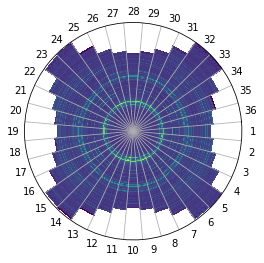

In [2]:
spectral_data = spectrum_fitting.FitSpectrum('../example_data/adc_041_7Nb_NDload_700C_15mms_00001.dat', 90)
spectral_data.plot_polar()

## Simple cake merging

In order to improve the quality of the analysed dataset we may want to average over multiple adjacent cakes to provide a better signal. The simplest way to do this is to add multiple cakes together. This will increase the peak height but will also increase the noise floor.

Firstly we can plot the spectrum of multiple cakes cakes. To plot multiple cakes provide a list of the cake number. By default the cakes are not merged and so plotted seperately:

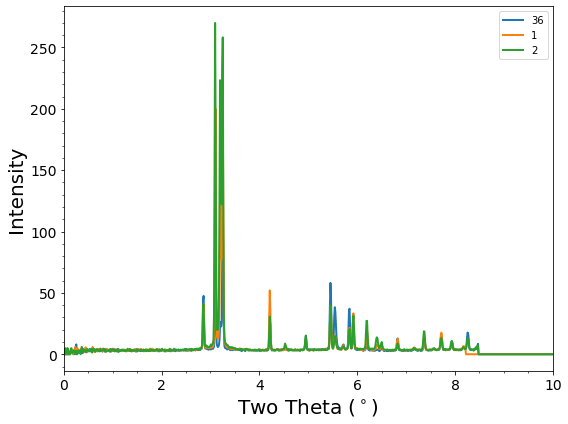

In [3]:
spectral_data.plot([36, 1, 2])

But if we specify the merge cakes parameter the cakes will be added together:

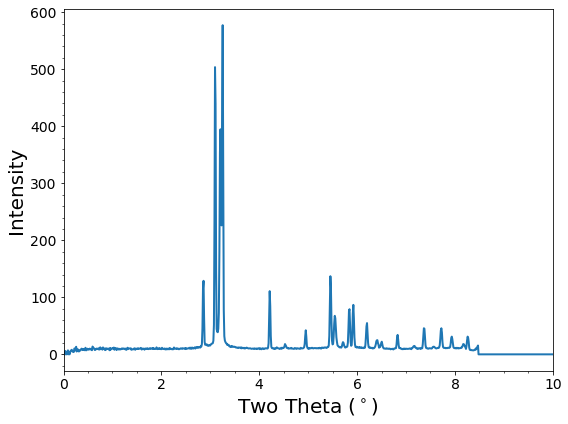

In [4]:
spectral_data.plot([36, 1, 2], merge_cakes=True)

Notice how the intensity compares to the unmerged cakes - it is the sum of all of the cakes.

Since it is not always easy to visualise which cakes number refers to which cake, there is a helper method `highlight_cakes` which will plot a schematic of the diffraction pattern, highlighting which cakes have been selected.

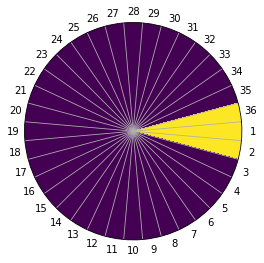

In [5]:
spectral_data.highlight_cakes([36, 1, 2])